In this Project we will be using:
- skillsnetwork for downloading the data
- pandas for managing the data.
- numpy for mathematical operations.
- scipy for statistical operations.
- seaborn for visualizing the data.
- matplotlib for additional plotting tools.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("laptops (1).csv",header=None)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [14]:
df.shape

(238, 12)

In [16]:
headers=["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency",
         "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]

In [18]:
df.columns=headers
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [20]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


This dataset contains various specifications of laptops, which can be used to predict their prices based on different features.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  238 non-null    object 
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    object 
 11  Price           238 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.4+ KB


<h1> Data Wrangling </h1>

In [26]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [28]:
question_mark_counts = (df == "?").sum()
question_mark_counts

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [30]:
df.replace("?",np.NaN,inplace=True)

In [32]:
unwanted_values = ["?", "N/A", "null", "NA", "Undefined", "None"]
# Check if any unwanted value exists
contains_unwanted = df.isin(unwanted_values).any().any()

if contains_unwanted:
    print("Dataset contains unwanted entries.")
else:
    print("No unwanted entries found.")

No unwanted entries found.


In [34]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm     object
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg          object
Price               int64
dtype: object

Note that we can update the Screen_Size_cm column such that all values are rounded to nearest 2 decimal places by using numpy.round()



In [37]:
print(df["Screen_Size_cm"].dtype)

object


In [39]:
df['Screen_Size_cm']=np.round(df['Screen_Size_cm'],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


# Replace the missing values
The continuous variable can be replaced with the mean and the categorical data can be replaced with the most frequently occuring value

In [42]:
avg_weight=df['Weight_kg'].astype(float).mean(axis=0)
df['Weight_kg']=df['Weight_kg'].replace(np.nan,avg_weight)

In [44]:
common_screen_size=df["Screen_Size_cm"].value_counts().idxmax()
common_screen_size

'39.624'

In [46]:
df["Screen_Size_cm"]=df["Screen_Size_cm"].replace(np.NaN,common_screen_size)

In [48]:
df["Weight_kg"]=df["Weight_kg"].astype("float")

# Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

1 inch = 2.54 cm

1 kg   = 2.205 pounds

In [51]:
df["Screen_Size_cm"]=df["Screen_Size_cm"].astype("float")
df['Screen_Size_cm']=df['Screen_Size_cm']*2.54
df=df.rename(columns={"Screen_Size_cm":"Screen_Size_inch"})

In [53]:
df['Weight_kg']=df['Weight_kg']*2.205
df=df.rename(columns={"Weight_kg":"Weight_Pounds"})

# Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [56]:
df["CPU_frequency"]=df["CPU_frequency"]/df["CPU_frequency"].max()

In [58]:
df["CPU_frequency"].head()

0    0.551724
1    0.689655
2    0.931034
3    0.551724
4    0.620690
Name: CPU_frequency, dtype: float64

# Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [61]:
df["Price"].dtype

dtype('int64')

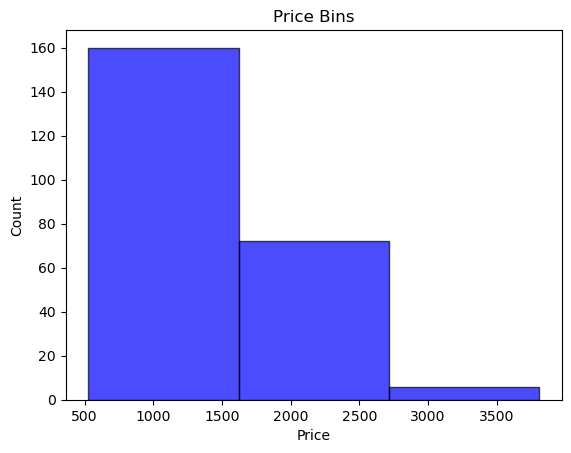

In [63]:
plt.hist(df["Price"],bins=3,color='blue',edgecolor='black',alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Bins")
plt.show()

In [64]:
bins=np.linspace(min(df["Price"]),max(df["Price"]),4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [65]:
group_names=["Low","Medium","High"]

Apply the function "cut" to determine what each value of df['Price'] belongs to

In [70]:
df["Price-binned"]=pd.cut(df["Price"],bins=bins,labels=group_names,include_lowest=True)

In [72]:
df[['Price','Price-binned']]

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
...,...,...
233,1891,Medium
234,1950,Medium
235,2236,Medium
236,883,Low


In [74]:
bin_count=df["Price-binned"].value_counts()
bin_count

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

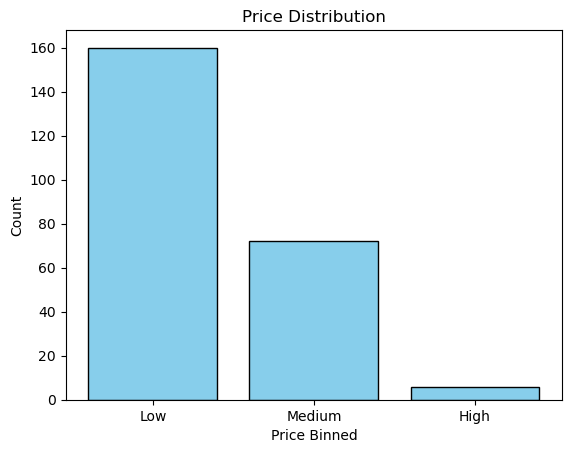

In [76]:
plt.bar(group_names,bin_count,color='skyblue',edgecolor='black')
plt.xlabel("Price Binned")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()

# Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [79]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Price-binned
0,Acer,4,IPS Panel,2,1,5,90.32240,0.551724,8,256,3.52800,978,Low
1,Dell,3,Full HD,1,1,3,100.64496,0.689655,4,256,4.85100,634,Low
2,Dell,3,Full HD,1,1,7,100.64496,0.931034,8,256,4.85100,946,Low
3,Dell,4,IPS Panel,2,1,5,85.80628,0.551724,8,128,2.69010,1244,Low
4,HP,4,Full HD,2,1,7,100.64496,0.620690,8,256,4.21155,837,Low


In [81]:
dummy_variables=pd.get_dummies(df["Screen"])

dummy_variables.rename(columns={"Full HD":"Screen_Full_HD","IPS Panel":"Screen_IPS_Panel"},inplace=True)

df.drop(columns=["Screen"],inplace=True)

df=pd.concat([df,dummy_variables],axis=1)

In [83]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Price-binned,Screen_Full_HD,Screen_IPS_Panel
0,Acer,4,2,1,5,90.32240,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,100.64496,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,100.64496,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,85.80628,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,100.64496,0.620690,8,256,4.21155,837,Low,True,False


# Exploratory Data Analysis

Continuous valued features

Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

In [87]:
import seaborn as sns

(0.0, 3974.15)

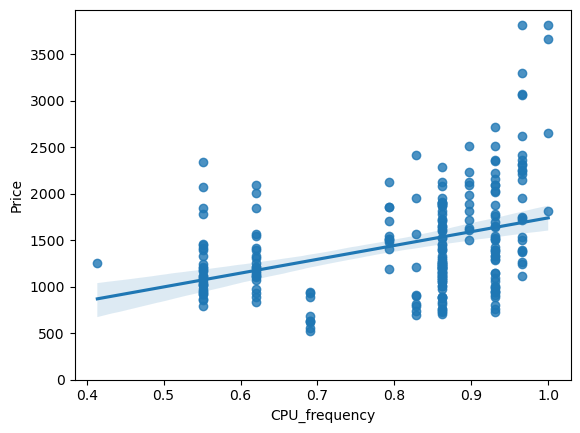

In [88]:
sns.regplot(x="CPU_frequency",y="Price",data=df)
plt.ylim(0,)

In [89]:
df[['CPU_frequency','Price']].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


- +1	Perfect	Positive
- 0.7 to 0.99	Strong Positive
- 0.4 to 0.69	Moderate Positive
- 0.1 to 0.39	Weak Positive
- 0	No Correlation	None
- -0.1 to -0.39	Weak Negative
- -0.4 to -0.69	Moderate Negative
- -0.7 to -0.99	Strong Negative
- -1	Perfect Negative

There are a few points far above the regression line, meaning some laptops are much more expensive than expected for their CPU frequency.
These could be premium models with additional high-end features.

The points are somewhat spread out around the regression line, meaning the correlation is moderate to weak.

CI is Narrow in the Middle, Wider at the Edges

- This means the model is more reliable for mid-range CPU frequencies.
- Predictions for very low or very high CPU frequencies are less reliable due to fewer data points.

(0.0, 3974.15)

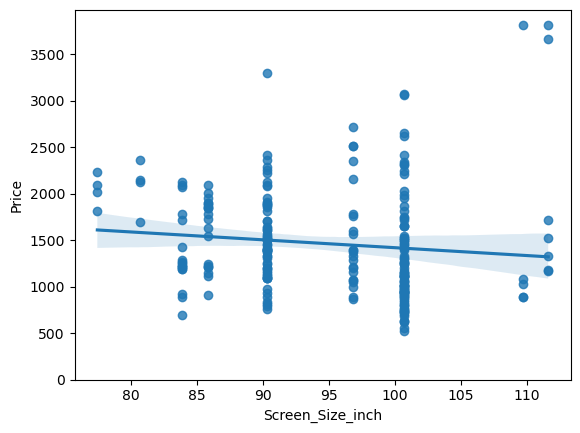

In [94]:
sns.regplot(x='Screen_Size_inch',y='Price',data=df)
plt.ylim(0,)

In [95]:
df[['Screen_Size_inch','Price']].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


- As screen size increases, price tends to decrease slightly.
- The points are widely scattered around the regression line, indicating a weak correlation.
- CI is relatively wide, which means the regression model has low confidence in predicting price based solely on screen size.

(0.0, 3974.15)

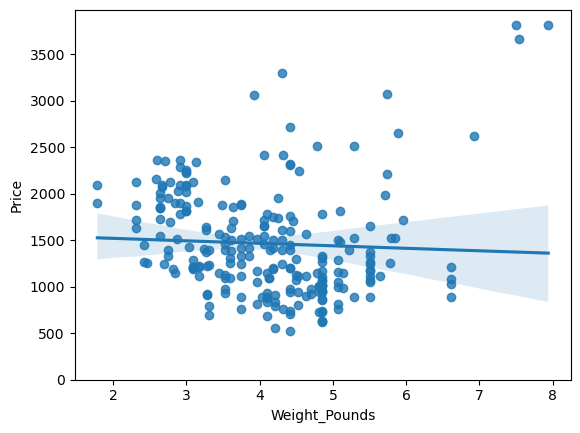

In [98]:
sns.regplot(x='Weight_Pounds',y='Price',data=df)
plt.ylim(0)

In [101]:
df[['Weight_Pounds','Price']].corr()

,Weight_Pounds,Price
Weight_Pounds,1.000000,-0.050312
Price,-0.050312,1.000000


- The regression line is almost flat, indicating no strong relationship between laptop weight and price.
- The points are widely scattered, meaning weight does not significantly affect laptop prices.
- There is a slight downward slope, suggesting that heavier laptops might be slightly less expensive on average.
- CI is wide indicating that Weight_Pounds is not a good determinant of price

# Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

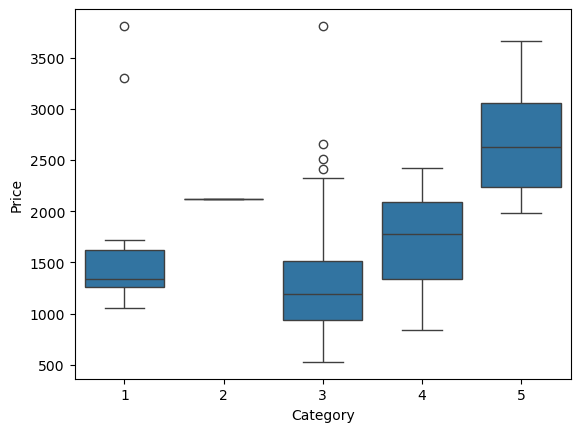

In [106]:
sns.boxplot(x="Category", y="Price", data=df)

This boxplot visualizes the distribution of laptop prices across different categories

- Laptops in Category 5 have the highest median price and widest range.
- The upper quartile shows that high-end laptops belong to this category.
- Category 4 has a higher median price than Category 3.
- Category 3 has more variation, with several laptops priced below 1000.
- Category 1 laptops have lower median prices and a narrower price range.
- Category 2 seems to have a very small range, indicating all laptops in this category have similar pricing.
- Multiple outliers above the upper whiskerin Category 3 Some laptops in this category may have better features (like a high-end GPU or CPU), causing the price to rise significantly above the median.

<Axes: xlabel='GPU', ylabel='Price'>

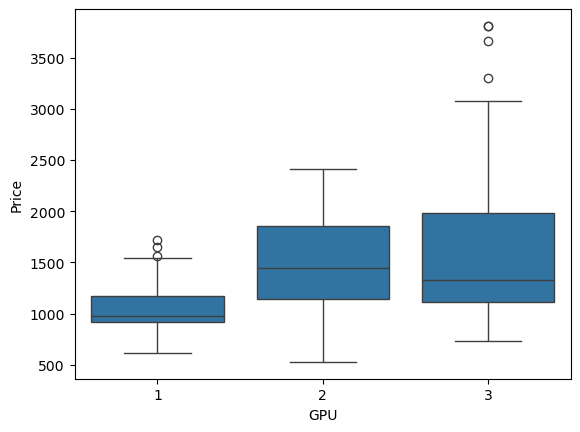

In [111]:
sns.boxplot(x="GPU", y="Price", data=df)

Category 1 (GPU = 1)

- Has a lower median price compared to the other categories.
- A few outliers above the upper whisker, indicating some laptops in this category have higher prices than expected

Category 2 (GPU = 2)

- The median price is higher than Category 1, as expected.
- The price distribution is more spread out.

Category 3 (GPU = 3)

- Has the highest median price among all categories.
- Contains several outliers, meaning that a few laptops are significantly more expensive than the majority.
- The overall spread is larger, showing that laptops with high-end GPUs vary greatly in price.

<Axes: xlabel='OS', ylabel='Price'>

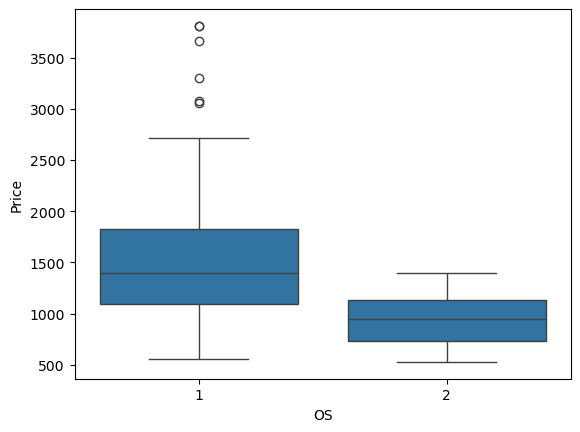

In [114]:
sns.boxplot(x="OS", y="Price", data=df)

OS = 1

- Has a higher median price compared to OS = 2.
- The price distribution is wider, meaning laptops with this OS vary significantly in price.
- Several outliers (above $2500), indicating that some laptops with this OS are significantly more expensive than the majority.

OS = 2

- Has a lower median price, suggesting that this OS is typically found on more budget-friendly laptops.
- The price range is more compact, meaning prices do not fluctuate as much as OS = 1.
- Fewer outliers, showing more stable pricing.

<Axes: xlabel='CPU_core', ylabel='Price'>

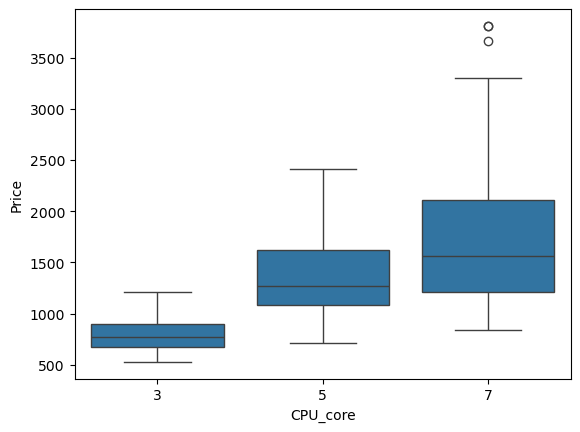

In [117]:
sns.boxplot(x="CPU_core", y="Price", data=df)

Laptops with 3 CPU Cores

- Have the lowest median price, suggesting that they are more budget-friendly.
- Prices are more closely packed, indicating less variation.
- No significant outliers.

Laptops with 5 CPU Cores

- Have a higher median price compared to 3-core CPUs.
- The price range is wider, showing more variation in pricing.
- Some outliers exist but are not extreme.

Laptops with 7 CPU Cores

- Have the highest median price, suggesting that higher-core CPUs are generally found in premium laptops.
- The price distribution is widest, meaning there's a significant variation in pricing.
- Multiple high-value outliers (above $3500), indicating the presence of some high-end expensive laptops.

<Axes: xlabel='RAM_GB', ylabel='Price'>

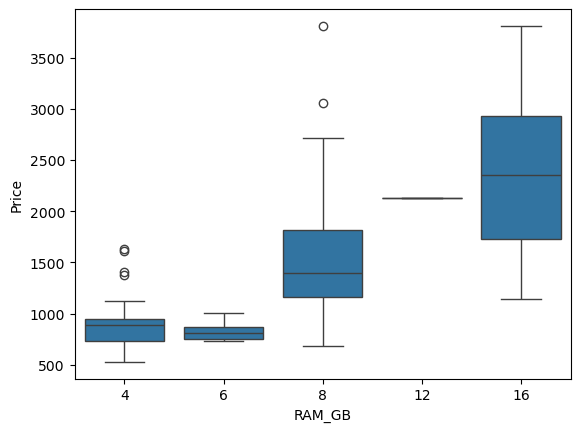

In [120]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

Laptops with 4GB RAM

- Have the lowest median price, indicating budget-friendly models.
- Price distribution is relatively narrow, meaning most prices are within a close range.
- Several low-end outliers exist.

Laptops with 6GB RAM

- Slightly higher prices than 4GB models, but the median price is similar.
- Very narrow price distribution, suggesting uniform pricing.

Laptops with 8GB RAM

- Noticeable increase in median price compared to 4GB and 6GB models.
- Wider price range, meaning more variations exist in pricing.
- Some high-end outliers above $3500.

Laptops with 12GB RAM

- Appear to have consistent pricing without much variation.
- Median price is slightly higher than 8GB models.

Laptops with 16GB RAM

- Have the highest median price, as they belong to the premium segment.
- Very wide price distribution, indicating both high-performance consumer laptops and workstation models.
- Presence of significant high-value outliers above $3500.

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

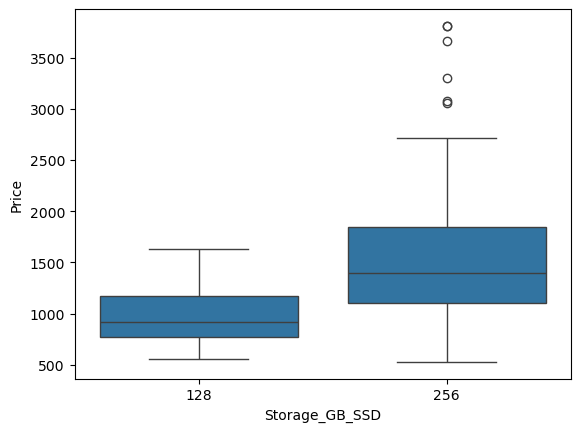

In [123]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

Laptops with 128GB SSD

- Lower median price compared to 256GB models.
- Price range is narrow, meaning most 128GB laptops fall within a similar price bracket.
- No significant high-end outliers, suggesting these are budget-oriented models.

Laptops with 256GB SSD

- Higher median price than 128GB models.
- Wider price distribution, indicating a mix of mid-range and premium laptops.
- Presence of several high-value outliers (above $3000), likely gaming or workstation laptops.

# Descriptive Statistical Analysis
Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [128]:
df.describe(include="all")

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Price-binned,Screen_Full_HD,Screen_IPS_Panel
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238,238
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,True,False
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,161,161
mean,NaN,3.205882,2.151261,1.058824,5.630252,94.765330,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,NaN,NaN
std,NaN,0.776533,0.638282,0.235790,1.241787,7.522853,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,NaN,NaN
min,NaN,1.000000,1.000000,1.000000,3.000000,77.419200,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,NaN,NaN
25%,NaN,3.000000,2.000000,1.000000,5.000000,90.322400,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,NaN,NaN
50%,NaN,3.000000,2.000000,1.000000,5.000000,96.774000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,NaN,NaN
75%,NaN,4.000000,3.000000,1.000000,7.000000,100.644960,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,NaN,NaN


# GroupBy and Pivot Tables
Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [131]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
grouped_test1 

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [133]:
grp_pivot=grouped_test1.pivot(index='GPU',columns='CPU_core')
grp_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

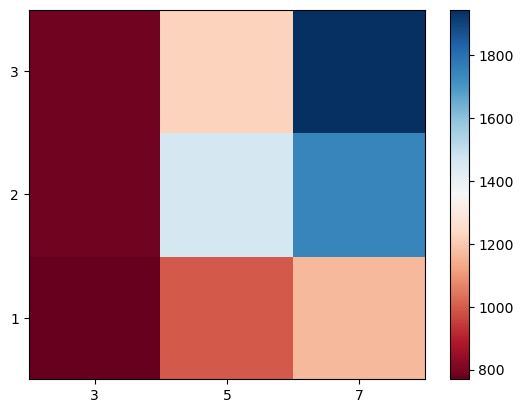

In [135]:
# Create the Plot

fig, ax = plt.subplots()
im = ax.pcolor(grp_pivot, cmap='RdBu')

#label names
row_labels = grp_pivot.columns.levels[1]
col_labels = grp_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grp_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grp_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Pearson Correlation and p-values

In [138]:
from scipy import stats

In [140]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_Pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830666
Weight_Pounds
The Pearson Correlation Coefficient for  Weight_Pounds  is -0.050312258377515455  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428

✅ RAM and CPU specifications are the most important factors influencing laptop price.

✅ GPU, storage, and laptop category also play a role, but to a lesser extent.

✅ Screen size and weight do not significantly affect pricing.

✅ The operating system shows a slight negative impact on price, possibly due to budget models running Linux or ChromeOS.

# Model Development

- Use Linear Regression in one variable to fit the parameters to a model
- Use Linear Regression in multiple variables to fit the parameters to a model
- Use Polynomial Regression in single variable tofit the parameters to a model
- Create a pipeline for performing linear regression using multiple features in polynomial scaling
- Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

# Single Linear Regression
You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
lm=LinearRegression()
X=df[['CPU_frequency']]
Y=df['Price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

C:\Users\zahee\AppData\Local\Temp\ipykernel_28052\1711156365.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Values')
C:\Users\zahee\AppData\Local\Temp\ipykernel_28052\1711156365.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

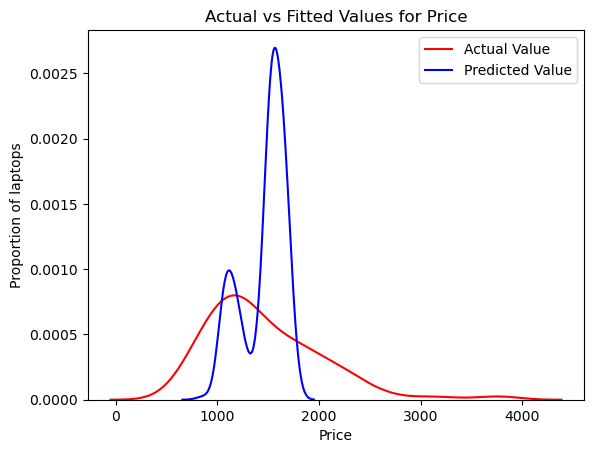

In [151]:
ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Values')
sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

- The actual price distribution (red line) is wider and more spread out.
- The predicted price distribution (blue line) is sharply concentrated around certain price points.
- This suggests the model isn’t capturing price variations well, possibly underestimating high-end and low-end laptop prices.
- The blue peaks are narrower, meaning the model is overconfident about certain price ranges.
- The model fails to generalize to the entire price range properly.
- The model might be overfitting to a limited pattern in the training data.
- Feature selection or transformations might need adjustment to capture the full price distribution.

In [154]:
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
#Evaluate the Mean Squared Error and R^2 score values for the model.
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


Mean Squared Error (MSE): 161680.5726 🔺 (High error indicates poor predictions)

R-squared (R²) Score: 0.134 ❌ (Very low, meaning the model explains only 13.4% of the variance in price, 86.6% of the variance remains unexplained) 

# Multiple Linear Regression

The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [160]:
lm1=LinearRegression()
Z=df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']]
lm1.fit(Z,df['Price'])
Yhat=lm1.predict(Z)
Yhat[0:5]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022])

C:\Users\zahee\AppData\Local\Temp\ipykernel_28052\3230932049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
C:\Users\zahee\AppData\Local\Temp\ipykernel_28052\3230932049.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

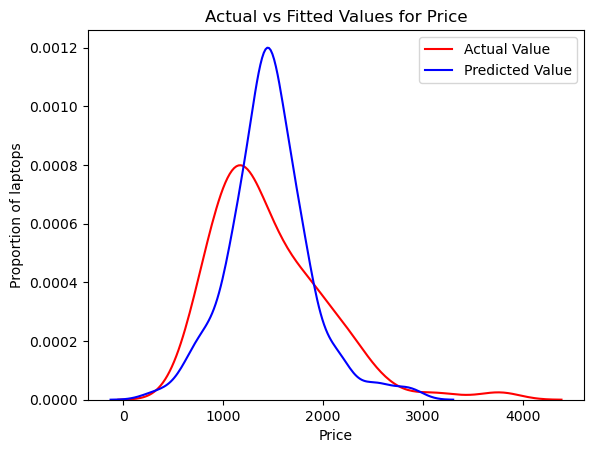

In [162]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value','Predicted Value'])

- The red line (Actual Prices) is more spread out than the blue line (Predicted Prices).

- The model underestimates higher-priced laptops (since the blue line drops off earlier).

- The peak of predictions is slightly shifted left compared to the actual distribution, meaning it tends to predict lower values overall.

- Still a mismatch at higher price ranges, meaning the model struggles with expensive laptops.

- Try Polynomial Regression or Random Forest/XGBoost to capture complex price patterns.


In [165]:
mse=mean_squared_error(df['Price'],Yhat)
print("The mean squared error is:",mse)
r2=lm1.score(Z,df['Price'])
print("The R-Squared error is:",r2)

The mean squared error is: 161680.57263893107
The R-Squared error is: 0.5082509055187374


1️⃣ Mean Squared Error (MSE): 161,680.57

- This represents the average squared difference between actual and predicted laptop prices.
- The lower the MSE, the better, and this is an improvement from the previous 284,583.44

2️⃣ R-Squared Score (R²): 0.508

- This means that 50.8% of the variation in laptop prices is explained by the model's features.
- While better than the previous 0.134, it still leaves 49.2% of price variations unexplained, meaning the model can be further improved.

# Polynomial Regression

Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.

In [170]:
#1️⃣ Convert X to a NumPy Array and Flatten It
#If X is a Pandas Series or DataFrame, .to_numpy() converts it into a NumPy array.
#.flatten() ensures X is a 1D array, which is required for polynomial fitting.
X=X.to_numpy().flatten()

#Fit a linear model degree 1
#np.polyfit(X, Y, 1): Fits a 1st-degree polynomial (linear regression).
#np.poly1d(f1): Creates a polynomial function p1(x) = aX + b
f1=np.polyfit(X,Y,1)
p1=np.poly1d(f1)

#Fit a Cubic Model (Degree 3)
#np.polyfit(X, Y, 3): Fits a 3rd-degree polynomial (captures more complex trends).
#np.poly1d(f3): Generates the polynomial equation p3(x) = aX³ + bX² + cX + d.
f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

#Fit a Quintic Model (Degree 5)
#np.polyfit(X, Y, 5): Fits a 5th-degree polynomial (even more complex curve).
#np.poly1d(f5): Returns the polynomial function p5(x) = aX⁵ + bX⁴ + cX³ + dX² + eX + f.
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)



In [172]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

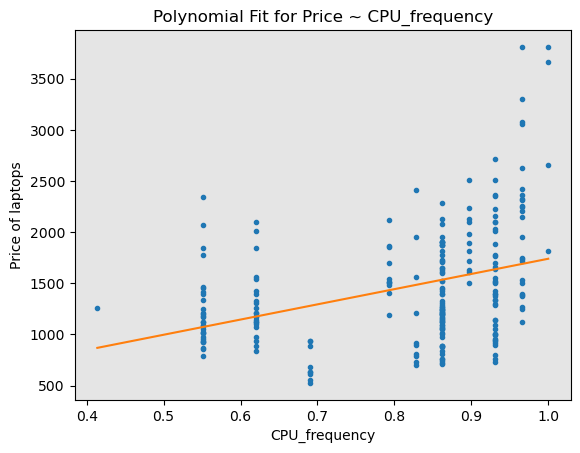

In [174]:
PlotPolly(p1, X, Y, 'CPU_frequency')

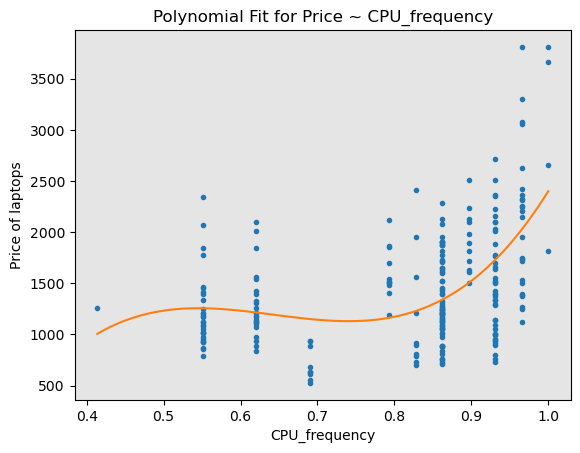

In [175]:
PlotPolly(p3, X, Y, 'CPU_frequency')

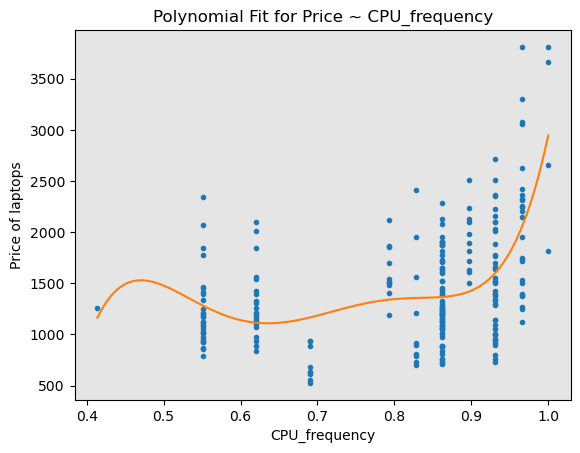

In [177]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [179]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.13444363210243238
The MSE value for 1st degree polynomial is:  284583.44058686297
The R-square value for 3rd degree polynomial is:  0.266926407965312
The MSE value for 3rd degree polynomial is:  241024.8630384874
The R-square value for 5th degree polynomial is:  0.30308227064424376
The MSE value for 5th degree polynomial is:  229137.29548058315


1st Degree Polynomial (Linear Model) 

R² = 0.1344 (13.44%)

MSE = 284,583.44

📌 Interpretation:
- The R² score is low, meaning the model explains only 13.44% of the variation in the price.
- The MSE is quite high, indicating a high prediction error.
- This suggests that a simple linear relationship is not sufficient to capture the price trends.

3rd Degree Polynomial (Cubic Model)

R² = 0.2669 (26.69%)

MSE = 241,024.86

📌 Interpretation:
- The R² score has improved, meaning the model now explains 26.69% of the variation in price.
- MSE has decreased, indicating lower prediction error compared to the linear model.
- The cubic model captures nonlinear patterns better, improving performance.

5th Degree Polynomial (Quintic Model)

R² = 0.3080 (30.80%)

MSE = 229,137.29

📌 Interpretation:
- The R² has increased further, meaning this model explains 30.80% of the variation in price.
- The MSE has dropped, meaning the predictions are more accurate compared to lower-degree models.
- The 5th-degree polynomial captures more complexity, but it may also be overfitting the training data.

- Higher-degree polynomials improve performance, but there’s still a lot of unexplained variation in price.
- R² is still low (~30%), meaning the model is not capturing all important factors.

🔍 MSE is decreasing, indicating better predictions, but the improvement from 3rd to 5th degree is small.

⚠️ Risk of Overfitting: The 5th-degree polynomial might be too complex for real-world predictions.

# Pipeline

Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline

In [184]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [186]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [187]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  223437.69957983194
R^2 for multi-variable polynomial pipeline is:  0.3204175081273689


✅ Best Model So Far – The multi-variable polynomial model has the lowest MSE and highest R².
    
✅ More Features Improved Accuracy – Using multiple features improved the model’s ability to explain price variation.
    
⚠️ Still Room for Improvement – R² = 32.04% is better but still relatively low, meaning more influential factors might be missing.

Model Type	                       
1st Degree (Linear)      	R² Score	 0.1344	              MSE 284,583.44

3rd Degree Polynomial          R² 0.2669	         MSE  241,024.86

5th Degree Polynomial	    R² 0.3080	          MSE 229,137.29

Multi-Variable Polynomial	R² 0.3204 ✅	   MSE223,437.70 ✅

# Model Evaluation and Refinement

- Use training, testing and cross validation to improve the performance of the dataset.
- Identify the point of overfitting of a model
- Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
- Use Grid Search to identify the best performing model using different hyperparameters

In [195]:
%pip install piplite

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement piplite (from versions: none)
ERROR: No matching distribution found for piplite


# Cross validation to improve the model

<h4>Cross-Fold Validation (or Cross-Validation, CV) is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets (or "folds"). It helps assess how well a model generalizes to unseen data.</h4>
Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.

In [207]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [197]:
y_data=df['Price']
x_data=df.drop('Price',axis=1)

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)
print("No. of test samples:",x_test.shape[0])
print("No. of training samples:",x_train.shape[0])

No. of test samples: 24
No. of training samples: 214


<h4>Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.

In [216]:
lr=LinearRegression()
lr.fit(x_train[['CPU_frequency']],y_train)
print(lr.score(x_train[['CPU_frequency']],y_train))
print(lr.score(x_test[['CPU_frequency']],y_test))

0.14829792099817962
-0.06599437350393766


- Training R² (0.148): Your model explains only 14.8% of the variance in the training data, meaning CPU frequency alone is not a strong predictor.
- Testing R² (-0.066): A negative R² on the test set indicates that the model performs worse than a simple mean prediction, meaning it doesn’t generalize well.

<h4>Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.

In [220]:
rcross=cross_val_score(lr,x_data[['CPU_frequency']],y_data,cv=4)
rcross
print("the mean of folds are:",rcross.mean())
print("the std of folds are:",rcross.std())

the mean of folds are: -0.16109232388595096
the std of folds are: 0.3849579786664708


Mean of folds (-0.161):

- The negative value means your model performs worse than a simple mean prediction across all folds.
- This confirms that CPU frequency alone is a weak predictor for the target variable.

Standard deviation (0.385):

- A high standard deviation suggests that the model’s performance varies significantly across different data splits.
- This could indicate overfitting, data imbalance, or high variance in your dataset.

# Overfitting
Split the data set into training and testing components again, this time reserving 50% of the data set for testing.

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.50,random_state=0)

To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.

This code is testing Polynomial Regression of different degrees (from 1 to 5) to analyze how well CPU frequency predicts the target variable.

- lre = LinearRegression(): Creates a Linear Regression model.
- Rsqu_test = []: Initializes an empty list to store R² scores for different polynomial degrees.
- order = [1, 2, 3, 4, 5]: Specifies different degrees of polynomial regression to test.

- PolynomialFeatures(degree=n): Expands CPU_frequency into polynomial terms (e.g., x, x², x³, etc.).
  
pr.fit_transform(x_train[['CPU_frequency']]):

- Degree 1: [1, x] (Same as Linear Regression)
- Degree 2: [1, x, x²]
- Degree 3: [1, x, x², x³]
- Degree 4: [1, x, x², x³, x⁴]
- Degree 5: [1, x, x², x³, x⁴, x⁵]
  
This transformation allows the model to capture non-linear relationships.


In [230]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
print(Rsqu_test)

[0.053221741761981134, -0.026920818679002867, 0.05156345792558803, -0.9948137915478965, -1.3759360956141218]


Plot the values of R^2 scores against the order. Note the point where the score drops

Text(0.5, 1.0, 'R^2 Using Test Data')

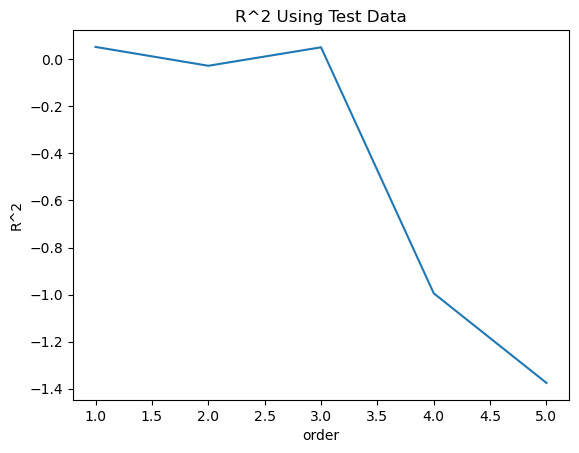

In [238]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Degree 4 and 5:

The R² value drops drastically negative (worse than -1).

This indicates severe overfitting—the model learns noise from training data and performs poorly on unseen data.

Linear (degree = 1) or cubic (degree = 3) regression might be the best fit.

Higher-degree polynomials lead to overfitting and make the model unreliable for predictions.

# Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [244]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 scores for training and testing data

Regularization is a powerful technique to make your model more robust and generalizable. It is essential in cases where:

✅ Your model is overfitting.

✅ You have many correlated features.

✅ You want to improve model interpretability.

- Overfitting happens when coefficients are too large.
- Regularization reduces their size and makes the model more generalizable.

In [249]:
from tqdm import tqdm

In [251]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████████████████████████████████████| 999/999 [00:08<00:00, 121.05it/s, Test Score=0.423, Train Score=0.669]


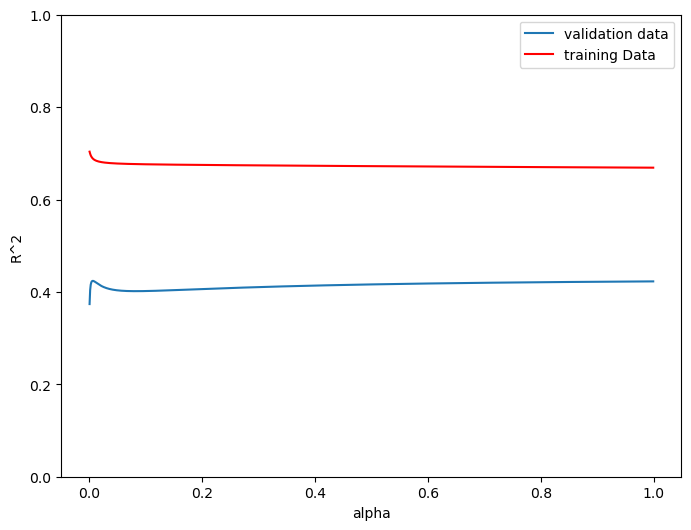

In [259]:
plt.figure(figsize=(8, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

Red Line (Training Data R²)

- The training R² is relatively high (~0.7) and does not change significantly with alpha.
- This suggests that the model fits the training data well.

Blue Line (Validation Data R²)

- The validation R² starts lower (~0.4) and slightly increases as alpha increases.
- This means that adding regularization improves generalization, preventing overfitting

<h5>Regularization is a technique used in machine learning to prevent overfitting by adding a penalty to the model’s complexity.

<h5>Generalization is the ability of a machine learning model to perform well on unseen data, not just the training data. A well-generalized model can make accurate predictions on new inputs, while a poorly generalized model may overfit or underfit.

<h5>In machine learning, adding a penalty means applying a constraint to the model’s weights (coefficients) to prevent overfitting. 

# Grid Search
Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. Assume the set of alpha values to be used as

{0.0001, 0.001, 0.01, 0.1, 1, 10}

In [275]:
parameters= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

Create a Ridge instance and run Grid Search using a 4 fold cross validation.

In [277]:
RR=Ridge()
grid1=GridSearchCV(RR,parameters,cv=4)

In [282]:
grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha

In [289]:
BestRR=grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.3009905048691818


The R² score on the test set is 0.399.

This means 39.9% of the variance in the target variable (Price) is explained by the model.

This is an improvement compared to the previous models, suggesting that Ridge Regression with the chosen alpha is a better fit.